In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [53]:
# Load the data (replace with your actual file paths)
gen1_data = pd.read_csv("gen1_train_comp_final.csv")  #parents
gen2_data = pd.read_csv("gen2_train_comp_final.csv")  #children

# Display the first few rows of the data
print("Gen 1 Data:")
print(gen1_data.head())
print("\nGen 2 Data:")
print(gen2_data.head())

Gen 1 Data:
   gen1_id sex_assigned_at_birth   age    SHgt_cm
0      774                     F  0.10  56.961812
1      774                     F  0.25  64.826190
2      774                     F  0.50  74.340764
3      774                     F  0.75  79.747338
4      774                     F  1.00  84.092569

Gen 2 Data:
   gen2_id sex_assigned_at_birth study_parent_sex  study_parent_id_new  AgeGr  \
0     3012                     M           mother                  636   0.10   
1     3012                     M           mother                  636   0.25   
2     3012                     M           mother                  636   0.50   
3     3012                     M           mother                  636   0.75   
4     3012                     M           mother                  636   1.00   

     SHgt_cm    Wgt_kg  
0  56.251625  4.636903  
1  64.491579       NaN  
2  70.465927       NaN  
3  73.992677       NaN  
4  79.343537       NaN  


In [74]:
# Check for missing values
print("\nMissing values in Cohort 1:")
print(gen1_data.isnull().sum())
print("\nMissing values in Cohort 2:")
print(gen2_data.isnull().sum())


Missing values in Cohort 1:
gen1_id                    0
sex_assigned_at_birth      0
age                        0
SHgt_cm                  310
SHgt_cm_CLEANED            0
dtype: int64

Missing values in Cohort 2:
gen2_id                     0
sex_assigned_at_birth       0
study_parent_sex            0
study_parent_id_new         0
AgeGr                       0
SHgt_cm                   512
Wgt_kg                   2045
SHgt_cm_CLEANED             0
Wgt_kg_CLEANED              0
dtype: int64


In [70]:
gen1_data = gen1_data.sort_values(by = ["gen1_id", "age"])
gen1_data_grouped = gen1_data.groupby("gen1_id")
gen1_data["SHgt_cm_CLEANED"] = gen1_data_grouped["SHgt_cm"].apply(lambda x: x.interpolate(method="linear")).bfill().values

gen2_data = gen2_data.sort_values(by = ["gen2_id", "AgeGr"])
gen2_data_grouped = gen2_data.groupby("gen2_id")
gen2_data["SHgt_cm_CLEANED"] = gen2_data_grouped["SHgt_cm"].apply(lambda x: x.interpolate(method="linear")).bfill().values
gen2_data["Wgt_kg_CLEANED"] = gen2_data_grouped["Wgt_kg"].apply(lambda x: x.interpolate(method="linear")).bfill().values

In [71]:
gen1_data[gen1_data["SHgt_cm_CLEANED"].isna()]

,gen1_id,sex_assigned_at_birth,age,SHgt_cm,SHgt_cm_CLEANED


In [73]:
# gen1_data[gen1_data["gen1_id"]==489]

In [75]:
gen1_data.describe()

,gen1_id,age,SHgt_cm,SHgt_cm_CLEANED
count,3636.00000,3636.000000,3326.000000,3636.000000
mean,574.80198,10.350000,135.439189,137.447983
std,114.14434,6.324272,38.831436,38.544494
min,370.00000,0.100000,50.627457,50.627457
25%,490.00000,4.750000,105.990771,109.724534
50%,569.00000,11.250000,146.593052,148.799857
75%,679.00000,15.625000,166.793640,168.120945
max,774.00000,20.000000,197.081343,197.081343


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'SHgt_cm'}>]], dtype=object)

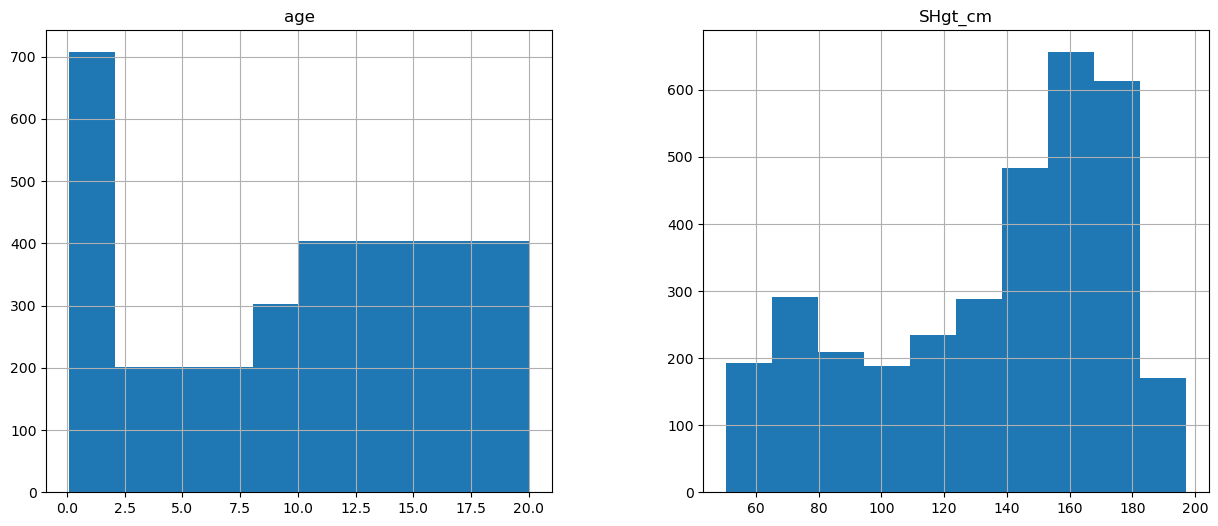

In [78]:
gen1_data[['age', 'SHgt_cm']].hist(figsize=(15, 6))

In [79]:
gen2_data.describe()

,gen2_id,study_parent_id_new,AgeGr,SHgt_cm,Wgt_kg,SHgt_cm_CLEANED,Wgt_kg_CLEANED
count,4224.000000,4224.000000,4224.000000,3712.000000,2179.000000,4224.000000,4224.000000
mean,2650.552083,556.604167,7.140909,118.697202,38.362150,117.183559,29.568137
std,139.645270,133.354678,5.646657,37.809589,16.880285,37.757088,16.099834
min,1332.000000,262.000000,0.100000,49.896709,4.636903,49.896709,4.636903
25%,2574.500000,453.250000,1.500000,83.766677,24.263125,82.666230,18.081623
50%,2648.500000,550.500000,6.500000,121.085655,34.270051,117.525367,21.803635
75%,2736.250000,668.000000,12.000000,151.367367,50.468043,150.386736,37.549897
max,3012.000000,774.000000,18.000000,196.140713,112.812058,196.140713,112.812058


array([[<Axes: title={'center': 'AgeGr'}>,
        <Axes: title={'center': 'SHgt_cm'}>],
       [<Axes: title={'center': 'Wgt_kg'}>, <Axes: >]], dtype=object)

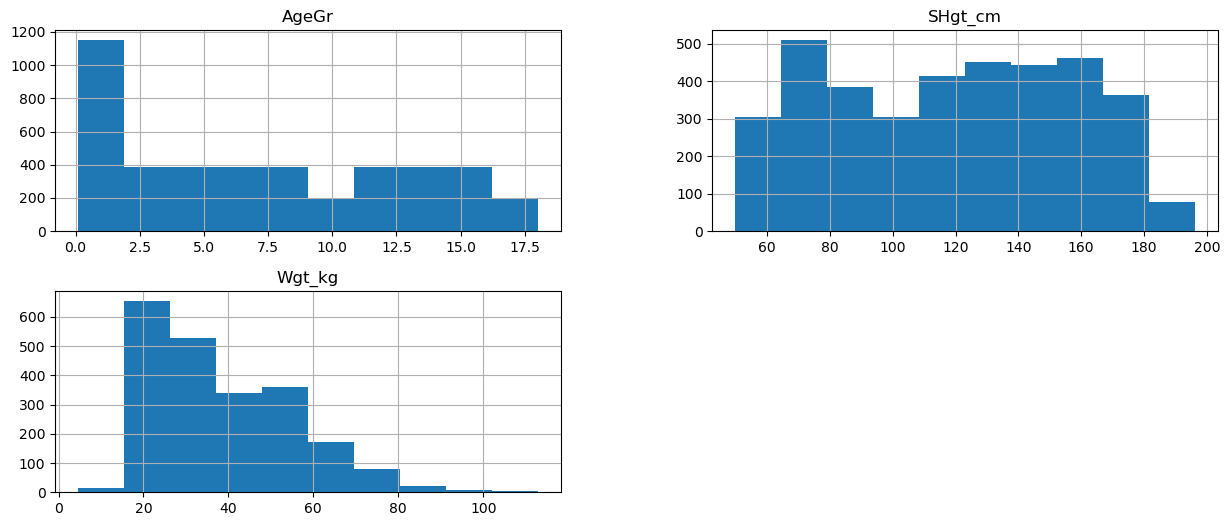

In [80]:
gen2_data[['AgeGr', 'SHgt_cm', 'Wgt_kg']].hist(figsize=(15, 6))

In [82]:
# Merge parent and child data
merged_data = pd.merge(gen2_data, gen1_data, how='left', left_on="study_parent_id_new", right_on="gen1_id", suffixes=("_child", "_parent"))
merged_data

,gen2_id,sex_assigned_at_birth_child,study_parent_sex,study_parent_id_new,AgeGr,SHgt_cm_child,Wgt_kg,SHgt_cm_CLEANED_child,Wgt_kg_CLEANED,gen1_id,sex_assigned_at_birth_parent,age,SHgt_cm_parent,SHgt_cm_CLEANED_parent
0,1332,F,mother,724,0.10,54.098866,NaN,54.098866,18.839206,NaN,NaN,NaN,NaN,NaN
1,1332,F,mother,724,0.25,59.128432,NaN,59.128432,18.839206,NaN,NaN,NaN,NaN,NaN
2,1332,F,mother,724,0.50,67.256015,NaN,67.256015,18.839206,NaN,NaN,NaN,NaN,NaN
3,1332,F,mother,724,0.75,72.511388,NaN,72.511388,18.839206,NaN,NaN,NaN,NaN,NaN
4,1332,F,mother,724,1.00,74.886310,NaN,74.886310,18.839206,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120489,3012,M,father,636,18.00,183.923713,78.542122,183.923713,78.542122,636.0,M,18.0,180.441848,180.441848
120490,3012,M,father,636,18.00,183.923713,78.542122,183.923713,78.542122,636.0,M,18.5,NaN,180.208484
120491,3012,M,father,636,18.00,183.923713,78.542122,183.923713,78.542122,636.0,M,19.0,179.975120,179.975120
120492,3012,M,father,636,18.00,183.923713,78.542122,183.923713,78.542122,636.0,M,19.5,NaN,180.359929


In [50]:
gen1_data.shape

(3636, 4)

In [51]:
gen2_data.shape

(4224, 7)

In [52]:
merged_data.shape

(120494, 11)